# 📊 Analyse Exploratoire - MatchData.csv

**Projet :** LOL Coach - Système de recommandation de champions  
**Dataset :** 100k+ matchs League of Legends  
**Objectif :** Comprendre la structure, la qualité et les patterns des données

---

## 📦 1. Imports et Configuration

In [5]:
# Imports standards
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configuration des graphiques
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Imports réussis")
print(f"📅 Date d'analyse : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Imports réussis
📅 Date d'analyse : 2025-12-19 15:21:36


## 📂 2. Chargement des Données

In [6]:
# Chargement du dataset principal
print("⏳ Chargement de matchData.csv...")
df = pd.read_csv('data/matchData.csv')

print(f"✅ Dataset chargé avec succès !")
print(f"📊 Dimensions : {df.shape[0]:,} lignes × {df.shape[1]:,} colonnes")
print(f"💾 Taille en mémoire : {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

⏳ Chargement de matchData.csv...
✅ Dataset chargé avec succès !
📊 Dimensions : 101,843 lignes × 1,770 colonnes
💾 Taille en mémoire : 1858.62 MB


## 🔍 3. Aperçu Général des Données

In [7]:
# Aperçu des premières lignes
print("📋 Aperçu des 5 premières lignes :")
display(df.head())

📋 Aperçu des 5 premières lignes :


,dataVersion,matchId,endOfGameResult,gameCreation,gameDuration,gameEndTimestamp,gameId,gameMode,gameName,gameType,gameVersion,mapId,participant0PlayerScore0,participant0PlayerScore1,participant0PlayerScore10,participant0PlayerScore11,participant0PlayerScore2,participant0PlayerScore3,participant0PlayerScore4,participant0PlayerScore5,participant0PlayerScore6,participant0PlayerScore7,participant0PlayerScore8,participant0PlayerScore9,participant0AllInPings,...,team1Ban1ChampionId,team1Ban1PickTurn,team1Ban2ChampionId,team1Ban2PickTurn,team1Ban3ChampionId,team1Ban3PickTurn,team1Ban4ChampionId,team1Ban4PickTurn,team1FeatsEPIC_MONSTER_KILLFeatState,team1FeatsFIRST_BLOODFeatState,team1FeatsFIRST_TURRETFeatState,team1BaronFirst,team1BaronKills,team1ChampionFirst,team1ChampionKills,team1DragonFirst,team1DragonKills,team1HordeFirst,team1HordeKills,team1InhibitorFirst,team1InhibitorKills,team1RiftHeraldFirst,team1RiftHeraldKills,team1TowerFirst,team1TowerKills
0,2,NA1_5348438296,GameComplete,1755372956560,1682,1755374669877,5348438296,CLASSIC,teambuilder-match-5348438296,MATCHED_GAME,15.16.704.6097,11,0,0,0,0,0,0,0,0,0,0,0,0,0,...,238,7,234,8,80,9,114,10,2,1001,1001,False,0,True,25,True,2,False,0,False,0,False,0,False,2
1,2,NA1_5348419072,GameComplete,1755370753217,1759,1755372544375,5348419072,CLASSIC,teambuilder-match-5348419072,MATCHED_GAME,15.16.704.6097,11,0,0,0,0,0,0,0,0,0,0,0,0,0,...,350,7,111,8,9,9,105,10,1,3,1,False,0,True,27,False,0,True,3,False,0,False,0,True,2
2,2,NA1_5345908214,GameComplete,1755055472135,2491,1755057984148,5345908214,CLASSIC,teambuilder-match-5345908214,MATCHED_GAME,15.15.701.6241,11,0,0,0,0,0,0,0,0,0,0,0,0,0,...,893,7,201,8,36,9,82,10,3,1001,1,False,0,False,24,True,4,False,0,True,3,True,1,True,11
3,2,NA1_5341292117,GameComplete,1754532281603,1973,1754534283418,5341292117,CLASSIC,teambuilder-match-5341292117,MATCHED_GAME,15.15.701.6241,11,0,0,0,0,0,0,0,0,0,0,0,0,1,...,111,7,30,8,233,9,3,10,2,1001,1001,False,0,True,28,True,3,False,0,False,0,True,1,False,5
4,2,NA1_5341241370,GameComplete,1754529263025,2376,1754531661796,5341241370,CLASSIC,teambuilder-match-5341241370,MATCHED_GAME,15.15.701.6241,11,0,0,0,0,0,0,0,0,0,0,0,0,0,...,238,7,141,8,161,9,36,10,1,3,1,False,0,True,27,False,3,False,1,True,1,True,1,True,7


In [8]:
# Informations générales
print("📊 Informations générales sur le dataset :")
df.info()

📊 Informations générales sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101843 entries, 0 to 101842
Columns: 1770 entries, dataVersion to team1TowerKills
dtypes: bool(106), float64(10), int64(1558), object(96)
memory usage: 1.3+ GB


In [9]:
# Statistiques descriptives
print("📈 Statistiques descriptives :")
display(df.describe())

📈 Statistiques descriptives :


,dataVersion,gameCreation,gameDuration,gameEndTimestamp,gameId,mapId,participant0PlayerScore0,participant0PlayerScore1,participant0PlayerScore10,participant0PlayerScore11,participant0PlayerScore2,participant0PlayerScore3,participant0PlayerScore4,participant0PlayerScore5,participant0PlayerScore6,participant0PlayerScore7,participant0PlayerScore8,participant0PlayerScore9,participant0AllInPings,participant0AssistMePings,participant0Assists,participant0BaronKills,participant0BasicPings,participant0ChampExperience,participant0ChampLevel,...,team0HordeKills,team0InhibitorKills,team0RiftHeraldKills,team0TowerKills,team1TeamId,team1Ban0ChampionId,team1Ban0PickTurn,team1Ban1ChampionId,team1Ban1PickTurn,team1Ban2ChampionId,team1Ban2PickTurn,team1Ban3ChampionId,team1Ban3PickTurn,team1Ban4ChampionId,team1Ban4PickTurn,team1FeatsEPIC_MONSTER_KILLFeatState,team1FeatsFIRST_BLOODFeatState,team1FeatsFIRST_TURRETFeatState,team1BaronKills,team1ChampionKills,team1DragonKills,team1HordeKills,team1InhibitorKills,team1RiftHeraldKills,team1TowerKills
count,101843.0,1.018430e+05,101843.000000,1.018430e+05,1.018430e+05,101843.0,101843.0,101843.0,101843.0,101843.0,101843.0,101843.0,101843.0,101843.0,101843.0,101843.0,101843.0,101843.0,101843.000000,101843.000000,101843.000000,101843.000000,101843.0,101843.000000,101843.000000,...,101843.000000,101843.000000,101843.000000,101843.000000,101843.0,101843.000000,101843.0,101843.000000,101843.0,101843.000000,101843.0,101843.000000,101843.0,101843.000000,101843.0,101843.000000,101843.000000,101843.000000,101843.000000,101843.000000,101843.000000,101843.000000,101843.000000,101843.000000,101843.000000
mean,2.0,1.754234e+12,1681.671102,1.754236e+12,5.338820e+09,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.499573,2.160767,5.471471,0.017969,0.0,15098.016054,15.265664,...,1.627603,0.852253,0.518308,5.640280,200.0,224.078965,6.0,223.740071,7.0,221.935224,8.0,221.720423,9.0,214.424870,10.0,220.218474,503.225386,450.896576,0.381008,27.683837,2.018126,1.304400,0.829237,0.396493,5.529020
std,0.0,8.890526e+08,434.618782,8.890557e+08,7.432558e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.038582,4.240783,4.204097,0.135546,0.0,4671.851014,2.843606,...,1.341234,1.159243,0.499667,3.673192,0.0,268.122017,0.0,267.729217,0.0,268.271457,0.0,268.886513,0.0,269.801533,0.0,413.092639,499.044705,497.615968,0.580246,12.341250,1.367637,1.333561,1.138713,0.489171,3.710907
min,2.0,1.752622e+12,100.000000,1.752624e+12,5.326076e+09,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,200.0,-1.000000,6.0,-1.000000,7.0,-1.000000,8.0,-1.000000,9.0,-1.000000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.0,1.753486e+12,1476.000000,1.753488e+12,5.332301e+09,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.000000,0.000000,0.0,12476.000000,14.000000,...,0.000000,0.000000,0.000000,2.000000,200.0,43.000000,6.0,43.000000,7.0,40.000000,8.0,40.000000,9.0,39.000000,10.0,1.000000,3.000000,1.000000,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,2.0,1.754262e+12,1706.000000,1.754263e+12,5.338759e+09,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5.000000,0.000000,0.0,15260.000000,16.000000,...,2.000000,0.000000,1.000000,5.000000,200.0,117.000000,6.0,117.000000,7.0,114.000000,8.0,114.000000,9.0,106.000000,10.0,2.000000,1001.000000,1.000000,0.000000,28.000000,2.000000,1.000000,0.000000,0.000000,5.000000
75%,2.0,1.754998e+12,1926.000000,1.754999e+12,5.345419e+09,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.000000,8.000000,0.000000,0.0,17964.000000,17.000000,...,3.000000,2.000000,1.000000,9.000000,200.0,238.000000,6.0,238.000000,7.0,238.000000,8.0,238.000000,9.0,238.000000,10.0,3.000000,1001.000000,1001.000000,1.000000,36.000000,3.000000,3.000000,1.000000,1.000000,9.000000
max,2.0,1.755746e+12,4416.00000

## 🎮 4. Analyse des Matchs

⏱️ ANALYSE DE LA DURÉE DES MATCHS
Durée moyenne : 28.03 minutes
Durée médiane : 28.43 minutes
Durée min : 1.67 minutes
Durée max : 73.60 minutes
Écart-type : 7.24 minutes


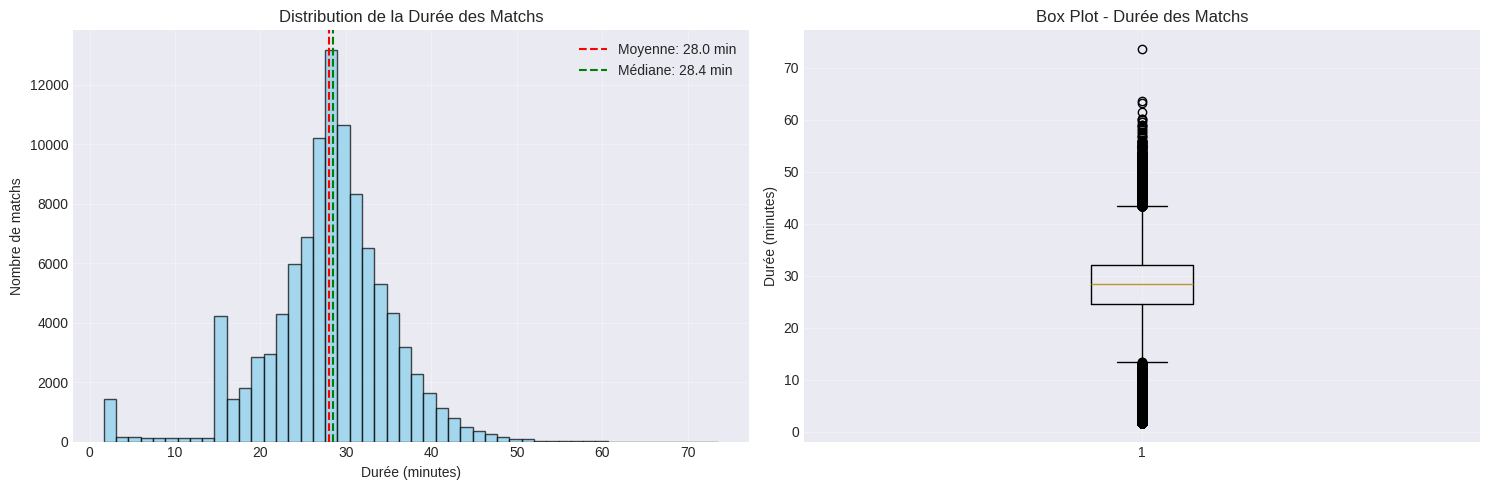


⚠️ Matchs courts (< 15 min) : 2,506 (2.46%)
⚠️ Matchs longs (> 60 min) : 6 (0.01%)


In [10]:
# Analyse de la durée des matchs
print("⏱️ ANALYSE DE LA DURÉE DES MATCHS")
print("=" * 50)

duration_minutes = df['gameDuration'] / 60

print(f"Durée moyenne : {duration_minutes.mean():.2f} minutes")
print(f"Durée médiane : {duration_minutes.median():.2f} minutes")
print(f"Durée min : {duration_minutes.min():.2f} minutes")
print(f"Durée max : {duration_minutes.max():.2f} minutes")
print(f"Écart-type : {duration_minutes.std():.2f} minutes")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogramme
axes[0].hist(duration_minutes, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(duration_minutes.mean(), color='red', linestyle='--', label=f'Moyenne: {duration_minutes.mean():.1f} min')
axes[0].axvline(duration_minutes.median(), color='green', linestyle='--', label=f'Médiane: {duration_minutes.median():.1f} min')
axes[0].set_xlabel('Durée (minutes)')
axes[0].set_ylabel('Nombre de matchs')
axes[0].set_title('Distribution de la Durée des Matchs')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(duration_minutes, vert=True)
axes[1].set_ylabel('Durée (minutes)')
axes[1].set_title('Box Plot - Durée des Matchs')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identifier les matchs inhabituels
short_games = df[df['gameDuration'] < 900]  # < 15 minutes
long_games = df[df['gameDuration'] > 3600]  # > 60 minutes

print(f"\n⚠️ Matchs courts (< 15 min) : {len(short_games):,} ({len(short_games)/len(df)*100:.2f}%)")
print(f"⚠️ Matchs longs (> 60 min) : {len(long_games):,} ({len(long_games)/len(df)*100:.2f}%)")

🏆 ANALYSE DES VICTOIRES
Team 0 (Blue) : 51,418 victoires (50.49%)
Team 1 (Red) : 50,420 victoires (49.51%)


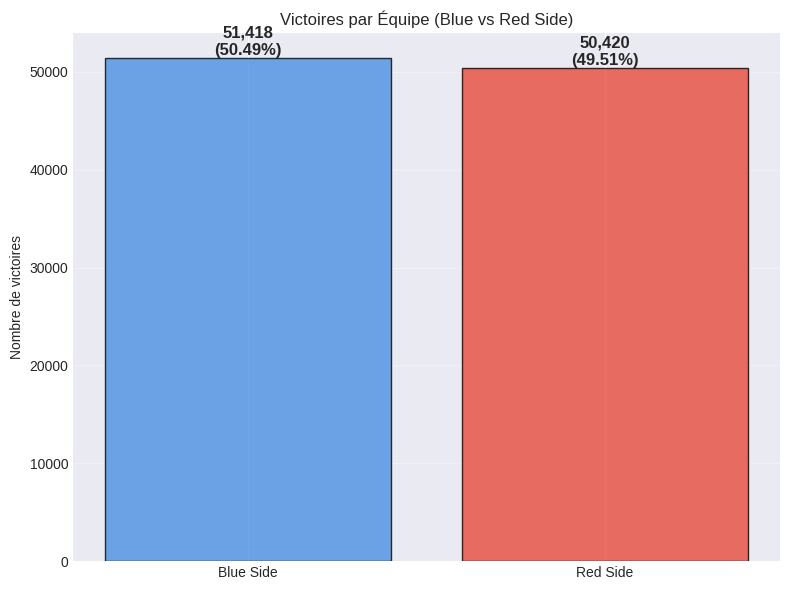


📊 Blue Side Advantage : +0.98% (négligeable)


In [11]:
# Analyse des victoires par équipe
print("🏆 ANALYSE DES VICTOIRES")
print("=" * 50)

team0_wins = df['team0Win'].sum()
team1_wins = df['team1Win'].sum()
total_games = len(df)

print(f"Team 0 (Blue) : {team0_wins:,} victoires ({team0_wins/total_games*100:.2f}%)")
print(f"Team 1 (Red) : {team1_wins:,} victoires ({team1_wins/total_games*100:.2f}%)")

# Visualisation
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
teams = ['Blue Side', 'Red Side']
wins = [team0_wins, team1_wins]
colors = ['#4A90E2', '#E74C3C']

bars = ax.bar(teams, wins, color=colors, edgecolor='black', alpha=0.8)
ax.set_ylabel('Nombre de victoires')
ax.set_title('Victoires par Équipe (Blue vs Red Side)')
ax.grid(True, alpha=0.3, axis='y')

# Ajouter les pourcentages sur les barres
for bar, win in zip(bars, wins):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{win:,}\n({win/total_games*100:.2f}%)',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Test du Blue Side Advantage
blue_advantage = (team0_wins - team1_wins) / total_games * 100
print(f"\n📊 Blue Side Advantage : {blue_advantage:+.2f}% {'(significatif)' if abs(blue_advantage) > 2 else '(négligeable)'}")

## 🎯 5. Analyse des Champions

In [12]:
# Extraire tous les champions joués
print("🎮 ANALYSE DES CHAMPIONS")
print("=" * 50)

# Liste de tous les champions
champion_columns = [col for col in df.columns if 'ChampionName' in col]
all_champions = []

for col in champion_columns:
    all_champions.extend(df[col].dropna().tolist())

# Compter les occurrences
champion_counts = pd.Series(all_champions).value_counts()

print(f"Nombre total de champions uniques : {len(champion_counts)}")
print(f"Nombre total de picks : {len(all_champions):,}")
print(f"Moyenne de picks par champion : {champion_counts.mean():.0f}")
print(f"Médiane de picks par champion : {champion_counts.median():.0f}")

print(f"\n🏆 TOP 20 CHAMPIONS LES PLUS JOUÉS :")
print(champion_counts.head(20))

print(f"\n📉 TOP 10 CHAMPIONS LES MOINS JOUÉS :")
print(champion_counts.tail(10))

🎮 ANALYSE DES CHAMPIONS
Nombre total de champions uniques : 171
Nombre total de picks : 1,018,430
Moyenne de picks par champion : 5956
Médiane de picks par champion : 5355

🏆 TOP 20 CHAMPIONS LES PLUS JOUÉS :
Yunara      26210
Nami        15259
Kaisa       14095
Viego       13137
Jhin        12837
Lulu        12729
Lucian      11634
Jinx        11417
Nautilus    11204
Sylas       11155
Pantheon    11095
Smolder     10935
Thresh      10773
JarvanIV    10719
Sivir       10639
Yasuo       10466
Zed         10082
Ekko        10044
Aphelios     9807
Karma        9753
Name: count, dtype: int64

📉 TOP 10 CHAMPIONS LES MOINS JOUÉS :
Illaoi          2333
Nilah           2190
Renata          2019
Heimerdinger    2005
Cassiopeia      1989
Taric           1799
Shyvana         1753
Rammus          1257
Skarner         1202
Kalista         1047
Name: count, dtype: int64


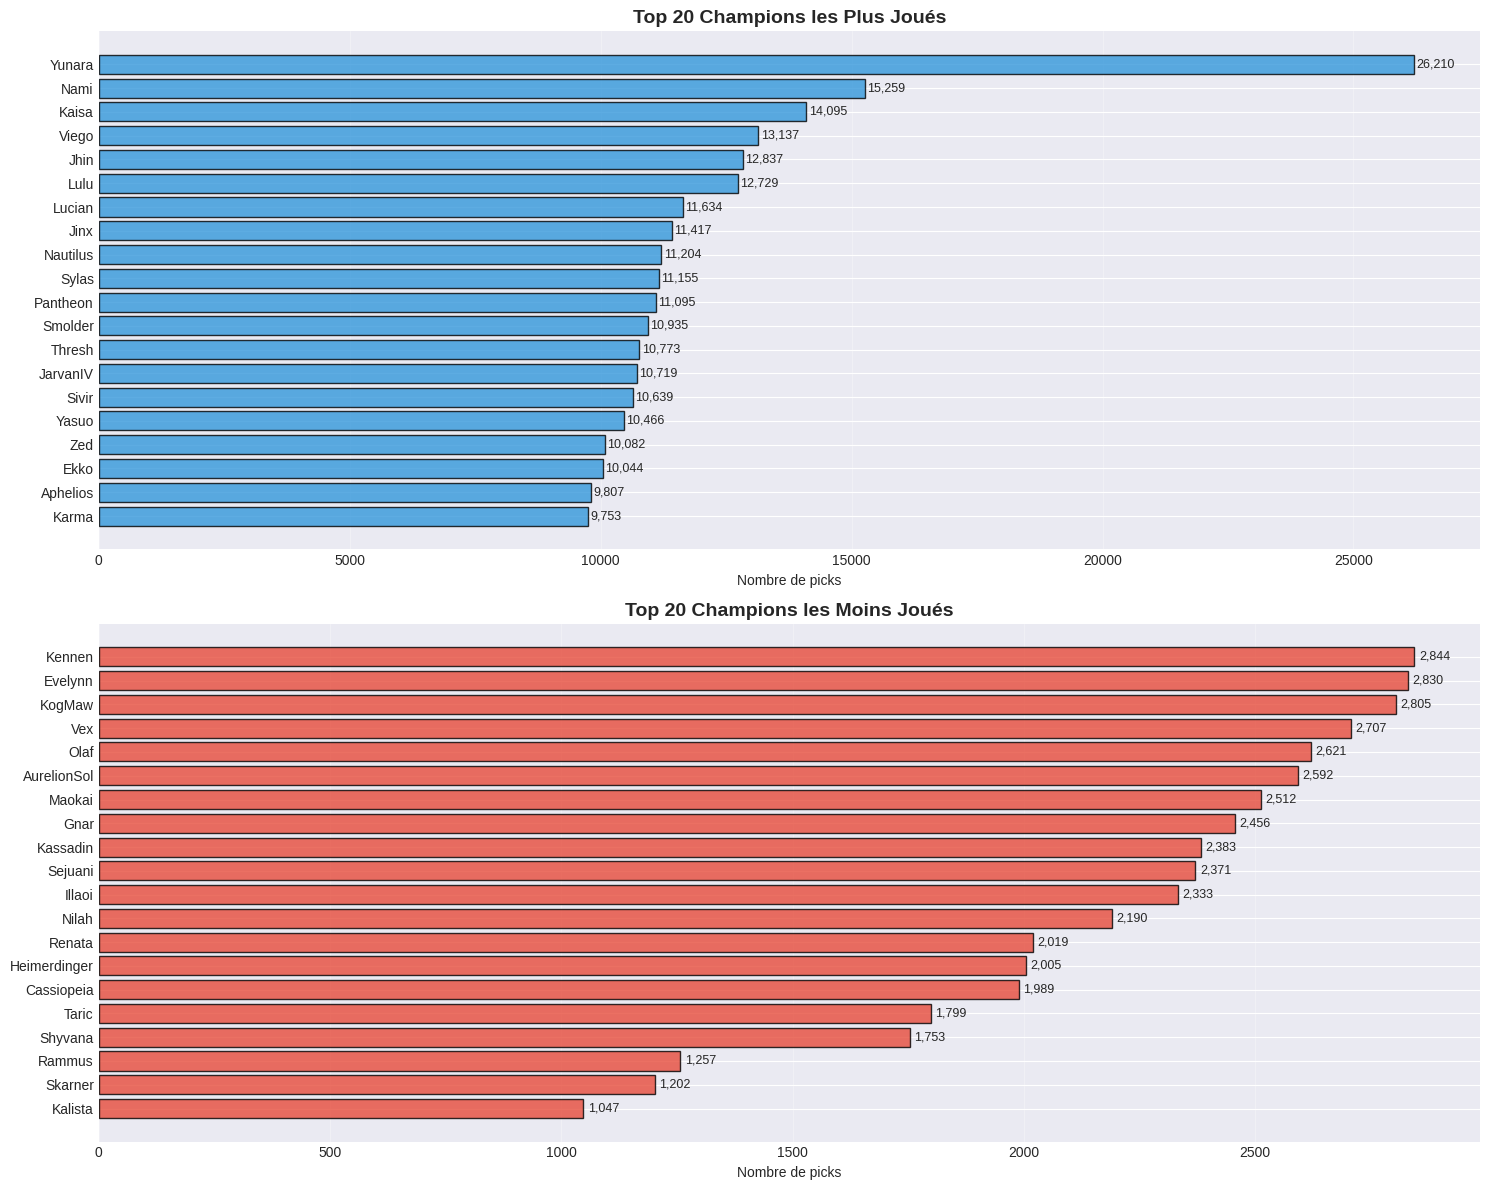

In [13]:
# Visualisation des champions les plus populaires
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Top 20
top_20 = champion_counts.head(20)
axes[0].barh(range(len(top_20)), top_20.values, color='#3498db', edgecolor='black', alpha=0.8)
axes[0].set_yticks(range(len(top_20)))
axes[0].set_yticklabels(top_20.index)
axes[0].set_xlabel('Nombre de picks')
axes[0].set_title('Top 20 Champions les Plus Joués', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Ajouter les valeurs
for i, v in enumerate(top_20.values):
    axes[0].text(v + 50, i, f'{v:,}', va='center', fontsize=9)

# Bottom 20
bottom_20 = champion_counts.tail(20)
axes[1].barh(range(len(bottom_20)), bottom_20.values, color='#e74c3c', edgecolor='black', alpha=0.8)
axes[1].set_yticks(range(len(bottom_20)))
axes[1].set_yticklabels(bottom_20.index)
axes[1].set_xlabel('Nombre de picks')
axes[1].set_title('Top 20 Champions les Moins Joués', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

# Ajouter les valeurs
for i, v in enumerate(bottom_20.values):
    axes[1].text(v + 10, i, f'{v:,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

📊 DISTRIBUTION DES PICK RATES
Pick rate moyen : 5.848%
Pick rate médian : 5.258%
Pick rate max (Yunara) : 25.736%
Pick rate min (Kalista) : 1.028%

📈 CATÉGORIES DE POPULARITÉ :
Très populaires (≥ 5%) : 91 champions
Populaires (2-5%) : 72 champions
Moyens (1-2%) : 8 champions
Peu populaires (0.5-1%) : 0 champions
Très rares (< 0.5%) : 0 champions


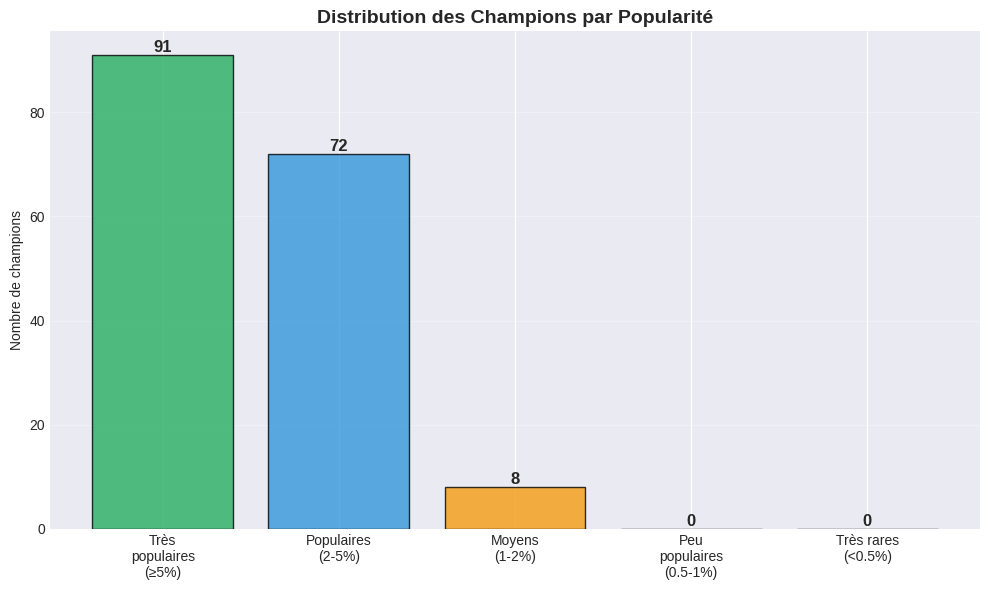

In [14]:
# Distribution des pick rates
print("📊 DISTRIBUTION DES PICK RATES")
print("=" * 50)

pick_rates = (champion_counts / len(df) * 100).sort_values(ascending=False)

print(f"Pick rate moyen : {pick_rates.mean():.3f}%")
print(f"Pick rate médian : {pick_rates.median():.3f}%")
print(f"Pick rate max ({pick_rates.index[0]}) : {pick_rates.iloc[0]:.3f}%")
print(f"Pick rate min ({pick_rates.index[-1]}) : {pick_rates.iloc[-1]:.3f}%")

# Catégoriser les champions
very_popular = pick_rates[pick_rates >= 5.0]
popular = pick_rates[(pick_rates >= 2.0) & (pick_rates < 5.0)]
average = pick_rates[(pick_rates >= 1.0) & (pick_rates < 2.0)]
unpopular = pick_rates[(pick_rates >= 0.5) & (pick_rates < 1.0)]
very_rare = pick_rates[pick_rates < 0.5]

print(f"\n📈 CATÉGORIES DE POPULARITÉ :")
print(f"Très populaires (≥ 5%) : {len(very_popular)} champions")
print(f"Populaires (2-5%) : {len(popular)} champions")
print(f"Moyens (1-2%) : {len(average)} champions")
print(f"Peu populaires (0.5-1%) : {len(unpopular)} champions")
print(f"Très rares (< 0.5%) : {len(very_rare)} champions")

# Visualisation
categories = ['Très\npopulaires\n(≥5%)', 'Populaires\n(2-5%)', 'Moyens\n(1-2%)', 
              'Peu\npopulaires\n(0.5-1%)', 'Très rares\n(<0.5%)']
counts = [len(very_popular), len(popular), len(average), len(unpopular), len(very_rare)]
colors_cat = ['#27ae60', '#3498db', '#f39c12', '#e67e22', '#e74c3c']

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
bars = ax.bar(categories, counts, color=colors_cat, edgecolor='black', alpha=0.8)
ax.set_ylabel('Nombre de champions')
ax.set_title('Distribution des Champions par Popularité', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 🎯 6. Analyse par Position/Rôle

🎮 ANALYSE PAR POSITION
Distribution des positions :
JUNGLE     : 204,576 (20.09%)
TOP        : 203,503 (19.98%)
BOTTOM     : 203,468 (19.98%)
MIDDLE     : 203,394 (19.97%)
UTILITY    : 203,015 (19.93%)
Invalid    :     474 ( 0.05%)


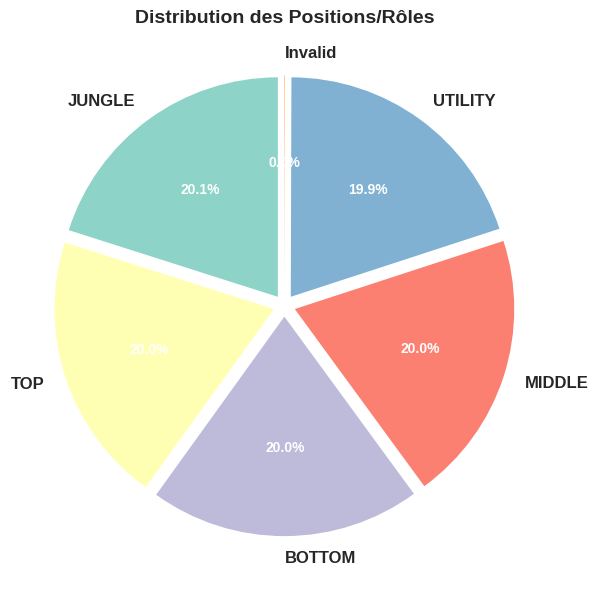

In [15]:
# Analyser les positions jouées
print("🎮 ANALYSE PAR POSITION")
print("=" * 50)

position_columns = [col for col in df.columns if 'IndividualPosition' in col]
all_positions = []

for col in position_columns:
    all_positions.extend(df[col].dropna().tolist())

position_counts = pd.Series(all_positions).value_counts()

print("Distribution des positions :")
for pos, count in position_counts.items():
    print(f"{pos:10s} : {count:7,} ({count/len(all_positions)*100:5.2f}%)")

# Visualisation
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
colors_pos = plt.cm.Set3(range(len(position_counts)))

wedges, texts, autotexts = ax.pie(position_counts.values, 
                                    labels=position_counts.index,
                                    autopct='%1.1f%%',
                                    colors=colors_pos,
                                    startangle=90,
                                    explode=[0.05] * len(position_counts))

for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

ax.set_title('Distribution des Positions/Rôles', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


🏆 TOP 10 CHAMPIONS PAR POSITION

TOP:
Aatrox         8192
Jax            6836
Renekton       6691
Sett           6325
Ambessa        6076
Fiora          5558
DrMundo        5548
Mordekaiser    5542
Riven          5479
Darius         5256
Name: count, dtype: int64

JUNGLE:
Viego       12118
JarvanIV    10252
LeeSin       7560
Kayn         6950
Volibear     6867
Trundle      6493
Nocturne     6140
Hecarim      6124
Khazix       6034
Ekko         5970
Name: count, dtype: int64

MIDDLE:
Ahri        8904
Sylas       7037
Galio       6782
Yasuo       6757
Syndra      6576
Viktor      6368
Orianna     6329
Akali       5908
Aurora      5669
Malzahar    5616
Name: count, dtype: int64

BOTTOM:
Yunara      25095
Kaisa       13355
Jhin        12535
Jinx        11350
Lucian      11268
Sivir       10504
Aphelios     9636
Caitlyn      9004
Smolder      8860
Ezreal       7510
Name: count, dtype: int64

UTILITY:
Nami        15222
Lulu        12492
Thresh      10689
Nautilus     9582
Milio        9407


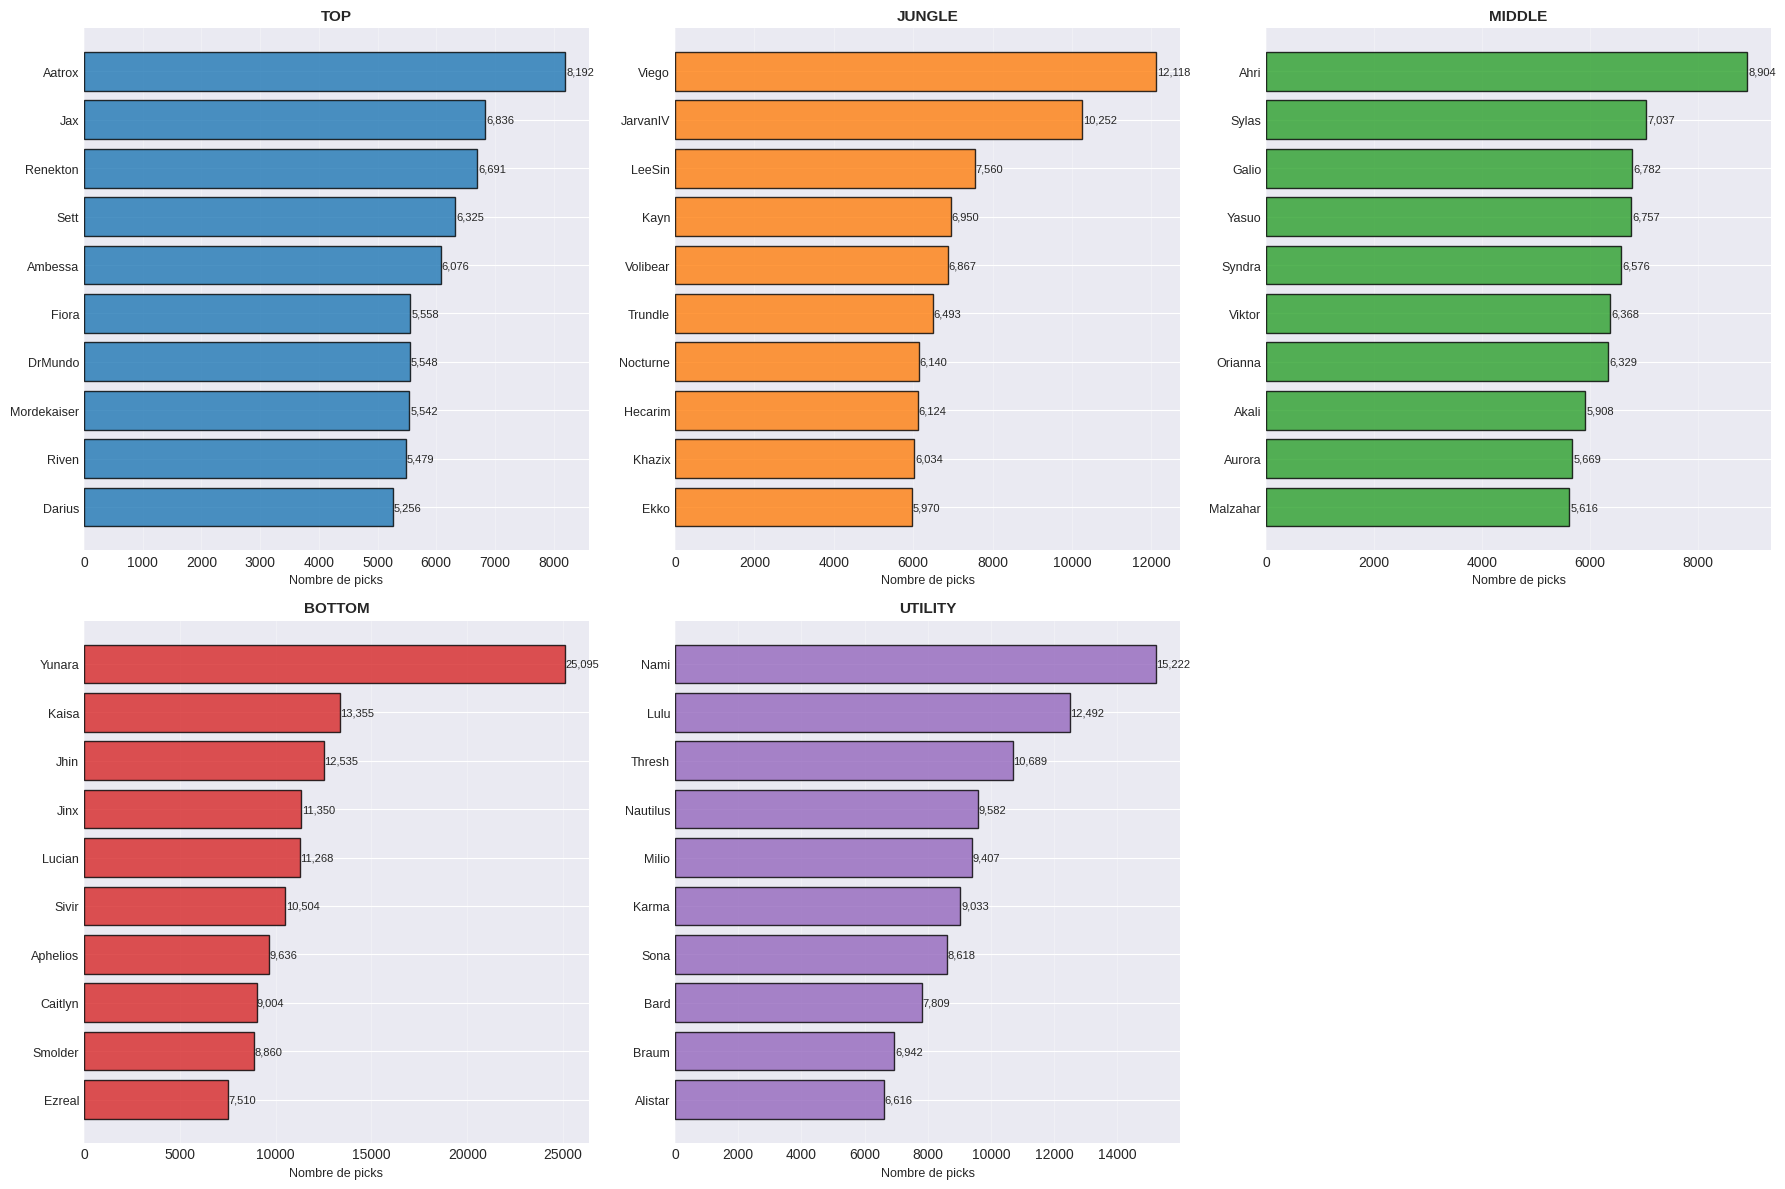

In [16]:
# Top champions par position
print("\n🏆 TOP 10 CHAMPIONS PAR POSITION")
print("=" * 50)

positions = ['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'UTILITY']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, position in enumerate(positions):
    # Filtrer les champions pour cette position
    champions_in_pos = []
    
    for i in range(10):  # 10 joueurs par match
        pos_col = f'participant{i}IndividualPosition'
        champ_col = f'participant{i}ChampionName'
        
        if pos_col in df.columns and champ_col in df.columns:
            mask = df[pos_col] == position
            champions_in_pos.extend(df[mask][champ_col].dropna().tolist())
    
    if champions_in_pos:
        champ_counts = pd.Series(champions_in_pos).value_counts().head(10)
        
        print(f"\n{position}:")
        print(champ_counts)
        
        # Visualisation
        axes[idx].barh(range(len(champ_counts)), champ_counts.values, 
                       color=plt.cm.tab10(idx), edgecolor='black', alpha=0.8)
        axes[idx].set_yticks(range(len(champ_counts)))
        axes[idx].set_yticklabels(champ_counts.index, fontsize=9)
        axes[idx].set_xlabel('Nombre de picks', fontsize=9)
        axes[idx].set_title(f'{position}', fontsize=11, fontweight='bold')
        axes[idx].invert_yaxis()
        axes[idx].grid(True, alpha=0.3, axis='x')
        
        # Ajouter les valeurs
        for i, v in enumerate(champ_counts.values):
            axes[idx].text(v + 20, i, f'{v:,}', va='center', fontsize=8)

# Supprimer le dernier subplot vide
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

## 📊 7. Analyse des Statistiques de Performance

⚔️ ANALYSE KDA PAR POSITION
         Kills  Deaths  Assists   KDA
TOP       5.25    5.67     5.37  1.87
JUNGLE    6.96    5.41     8.03  2.77
MIDDLE    6.20    5.40     6.61  2.37
BOTTOM    6.96    5.71     6.93  2.43
UTILITY   2.31    5.61    13.59  2.84


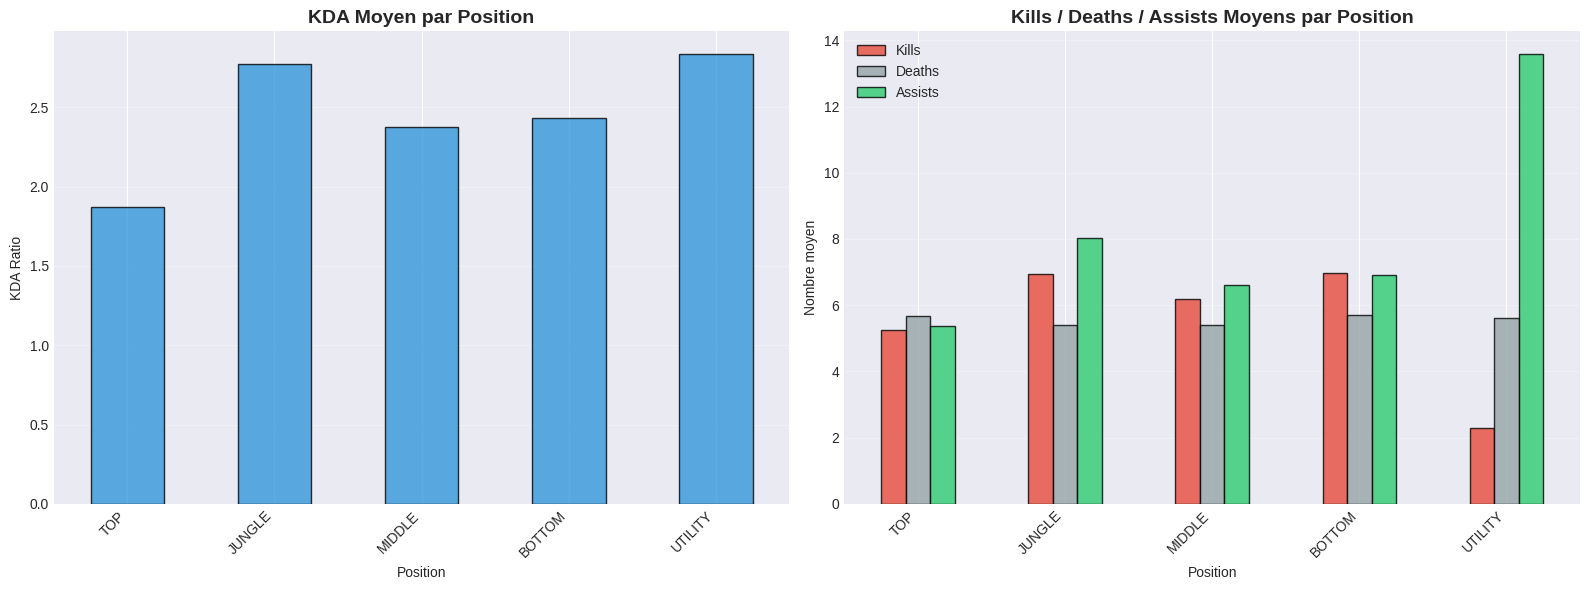

In [17]:
# Analyser les KDA moyens par position
print("⚔️ ANALYSE KDA PAR POSITION")
print("=" * 50)

kda_data = {}

for i in range(10):
    pos_col = f'participant{i}IndividualPosition'
    kills_col = f'participant{i}Kills'
    deaths_col = f'participant{i}Deaths'
    assists_col = f'participant{i}Assists'
    
    if all(col in df.columns for col in [pos_col, kills_col, deaths_col, assists_col]):
        temp_df = df[[pos_col, kills_col, deaths_col, assists_col]].dropna()
        
        for position in positions:
            mask = temp_df[pos_col] == position
            if position not in kda_data:
                kda_data[position] = {'kills': [], 'deaths': [], 'assists': []}
            
            kda_data[position]['kills'].extend(temp_df[mask][kills_col].tolist())
            kda_data[position]['deaths'].extend(temp_df[mask][deaths_col].tolist())
            kda_data[position]['assists'].extend(temp_df[mask][assists_col].tolist())

# Calculer les moyennes
kda_summary = {}
for position, stats in kda_data.items():
    avg_kills = np.mean(stats['kills'])
    avg_deaths = np.mean(stats['deaths'])
    avg_assists = np.mean(stats['assists'])
    kda_ratio = (avg_kills + avg_assists) / max(avg_deaths, 1)
    
    kda_summary[position] = {
        'Kills': avg_kills,
        'Deaths': avg_deaths,
        'Assists': avg_assists,
        'KDA': kda_ratio
    }

kda_df = pd.DataFrame(kda_summary).T
print(kda_df.round(2))

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# KDA moyen par position
kda_df['KDA'].plot(kind='bar', ax=axes[0], color='#3498db', edgecolor='black', alpha=0.8)
axes[0].set_title('KDA Moyen par Position', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('KDA Ratio')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')

# K/D/A par position
kda_df[['Kills', 'Deaths', 'Assists']].plot(kind='bar', ax=axes[1], 
                                              color=['#e74c3c', '#95a5a6', '#2ecc71'],
                                              edgecolor='black', alpha=0.8)
axes[1].set_title('Kills / Deaths / Assists Moyens par Position', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Nombre moyen')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].legend(['Kills', 'Deaths', 'Assists'])
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

💥 ANALYSE DES DÉGÂTS PAR POSITION
Dégâts moyens aux champions par position :
BOTTOM     : 23,988 dégâts
MIDDLE     : 23,180 dégâts
TOP        : 22,579 dégâts
JUNGLE     : 19,480 dégâts
UTILITY    : 11,150 dégâts


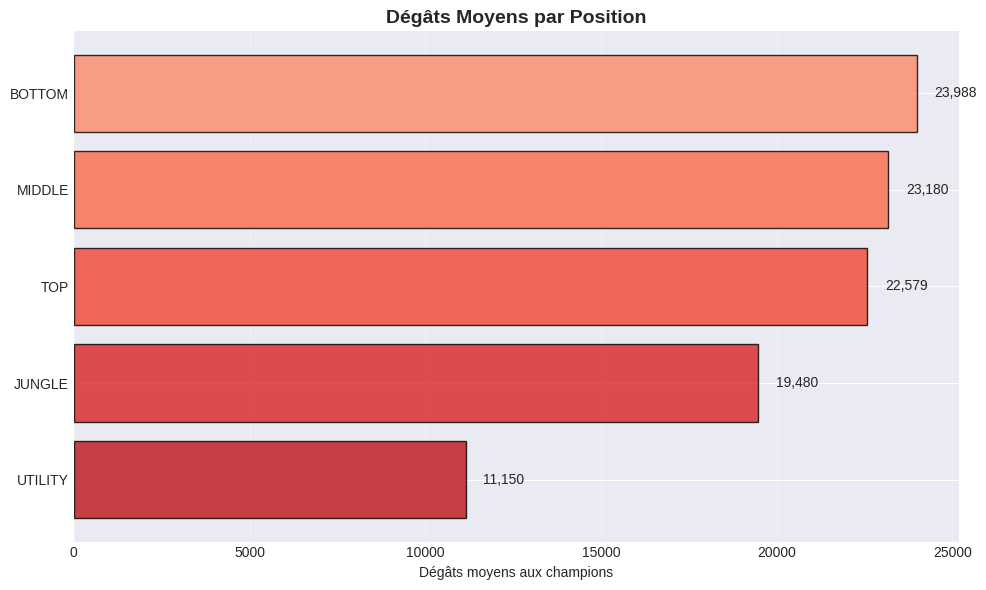

In [18]:
# Analyse des dégâts
print("💥 ANALYSE DES DÉGÂTS PAR POSITION")
print("=" * 50)

damage_data = {}

for i in range(10):
    pos_col = f'participant{i}IndividualPosition'
    dmg_col = f'participant{i}TotalDamageDealtToChampions'
    
    if pos_col in df.columns and dmg_col in df.columns:
        temp_df = df[[pos_col, dmg_col]].dropna()
        
        for position in positions:
            mask = temp_df[pos_col] == position
            if position not in damage_data:
                damage_data[position] = []
            
            damage_data[position].extend(temp_df[mask][dmg_col].tolist())

# Calculer les moyennes
avg_damage = {pos: np.mean(dmg) for pos, dmg in damage_data.items()}
avg_damage_series = pd.Series(avg_damage).sort_values(ascending=False)

print("Dégâts moyens aux champions par position :")
for pos, dmg in avg_damage_series.items():
    print(f"{pos:10s} : {dmg:,.0f} dégâts")

# Visualisation
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
colors_dmg = plt.cm.Reds(np.linspace(0.4, 0.8, len(avg_damage_series)))

ax.barh(range(len(avg_damage_series)), avg_damage_series.values, 
        color=colors_dmg, edgecolor='black', alpha=0.8)
ax.set_yticks(range(len(avg_damage_series)))
ax.set_yticklabels(avg_damage_series.index)
ax.set_xlabel('Dégâts moyens aux champions')
ax.set_title('Dégâts Moyens par Position', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(True, alpha=0.3, axis='x')

# Ajouter les valeurs
for i, v in enumerate(avg_damage_series.values):
    ax.text(v + 500, i, f'{v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## 🏆 8. Analyse des Objectifs (Dragons, Barons, Tours)

🐉 ANALYSE DES OBJECTIFS
Objectifs moyens par équipe :
             Blue   Red
Dragons      1.76  2.02
Barons       0.36  0.38
Tours        5.64  5.53
Inhibiteurs  0.85  0.83


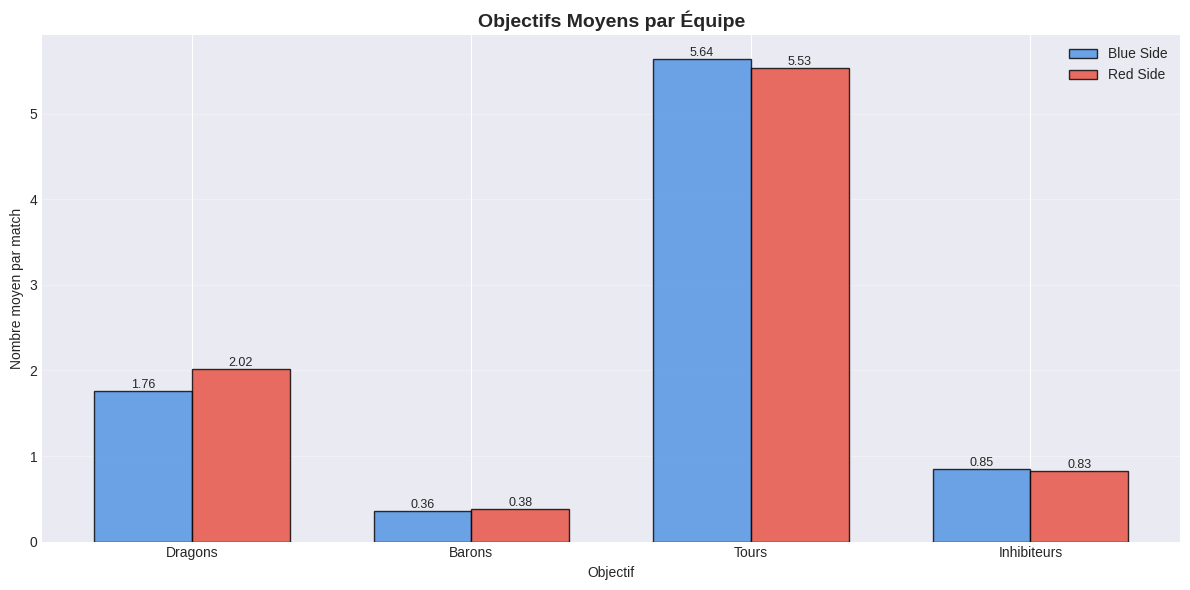

In [19]:
# Analyse des objectifs par équipe
print("🐉 ANALYSE DES OBJECTIFS")
print("=" * 50)

objectives = {
    'Dragons': ['team0DragonKills', 'team1DragonKills'],
    'Barons': ['team0BaronKills', 'team1BaronKills'],
    'Tours': ['team0TowerKills', 'team1TowerKills'],
    'Inhibiteurs': ['team0InhibitorKills', 'team1InhibitorKills']
}

obj_data = {}

for obj_name, cols in objectives.items():
    team0_avg = df[cols[0]].mean()
    team1_avg = df[cols[1]].mean()
    obj_data[obj_name] = {'Blue': team0_avg, 'Red': team1_avg}

obj_df = pd.DataFrame(obj_data).T

print("Objectifs moyens par équipe :")
print(obj_df.round(2))

# Visualisation
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

x = np.arange(len(obj_df))
width = 0.35

bars1 = ax.bar(x - width/2, obj_df['Blue'], width, label='Blue Side', 
               color='#4A90E2', edgecolor='black', alpha=0.8)
bars2 = ax.bar(x + width/2, obj_df['Red'], width, label='Red Side', 
               color='#E74C3C', edgecolor='black', alpha=0.8)

ax.set_xlabel('Objectif')
ax.set_ylabel('Nombre moyen par match')
ax.set_title('Objectifs Moyens par Équipe', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(obj_df.index)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


📊 CORRÉLATION OBJECTIFS → VICTOIRE
Corrélation avec la victoire (Blue Side) :
Tours           : +0.713
Inhibiteurs     : +0.594
Dragons         : +0.558
Barons          : +0.390
First Blood     : -0.264


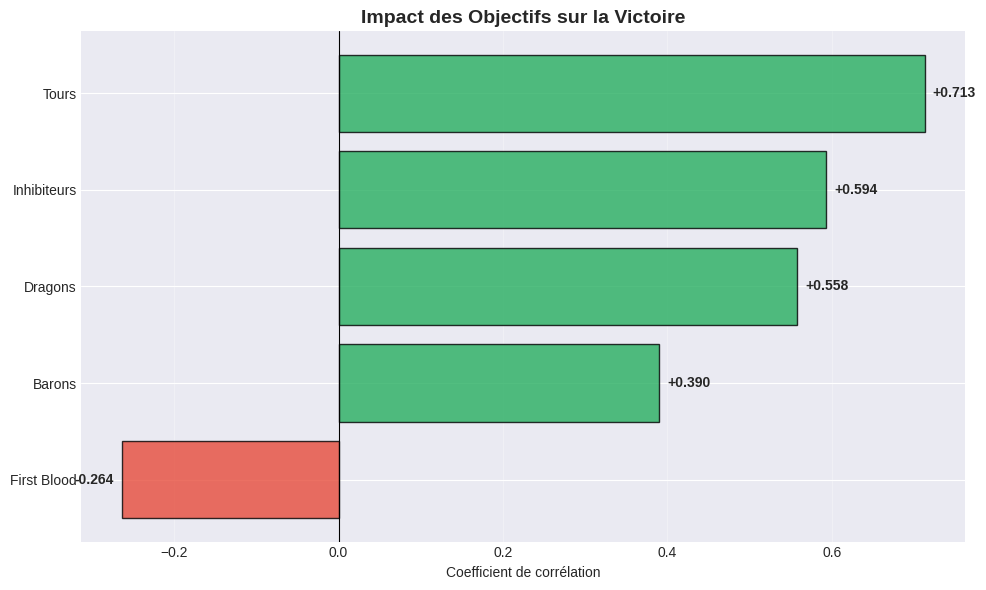

In [20]:
# Corrélation entre objectifs et victoire
print("\n📊 CORRÉLATION OBJECTIFS → VICTOIRE")
print("=" * 50)

# Pour Blue Side
correlations_blue = {
    'Dragons': df[['team0DragonKills', 'team0Win']].corr().iloc[0, 1],
    'Barons': df[['team0BaronKills', 'team0Win']].corr().iloc[0, 1],
    'Tours': df[['team0TowerKills', 'team0Win']].corr().iloc[0, 1],
    'Inhibiteurs': df[['team0InhibitorKills', 'team0Win']].corr().iloc[0, 1],
    'First Blood': df[['team0FeatsFIRST_BLOODFeatState', 'team0Win']].corr().iloc[0, 1]
}

corr_series = pd.Series(correlations_blue).sort_values(ascending=False)

print("Corrélation avec la victoire (Blue Side) :")
for obj, corr in corr_series.items():
    print(f"{obj:15s} : {corr:+.3f}")

# Visualisation
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

colors_corr = ['#27ae60' if c > 0 else '#e74c3c' for c in corr_series.values]
ax.barh(range(len(corr_series)), corr_series.values, color=colors_corr, edgecolor='black', alpha=0.8)
ax.set_yticks(range(len(corr_series)))
ax.set_yticklabels(corr_series.index)
ax.set_xlabel('Coefficient de corrélation')
ax.set_title('Impact des Objectifs sur la Victoire', fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linestyle='-', linewidth=0.8)
ax.invert_yaxis()
ax.grid(True, alpha=0.3, axis='x')

# Ajouter les valeurs
for i, v in enumerate(corr_series.values):
    ax.text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:+.3f}', 
            va='center', ha='left' if v > 0 else 'right', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 🔍 9. Analyse de la Qualité des Données

❓ VALEURS MANQUANTES
Nombre de colonnes avec valeurs manquantes : 34/1770

Top 20 colonnes avec le plus de valeurs manquantes :
participant1SummonerName    100.000000
participant9SummonerName    100.000000
participant8SummonerName    100.000000
participant7SummonerName    100.000000
participant5SummonerName    100.000000
participant4SummonerName    100.000000
participant0SummonerName    100.000000
participant6SummonerName    100.000000
participant2SummonerName    100.000000
participant3SummonerName    100.000000
participant0TeamPosition      0.064806
participant9TeamPosition      0.059896
participant7TeamPosition      0.057932
participant8TeamPosition      0.055969
participant5TeamPosition      0.052041
participant6TeamPosition      0.049095
participant2TeamPosition      0.048113
participant1TeamPosition      0.044186
participant3TeamPosition      0.042222
participant4TeamPosition      0.031421
dtype: float64


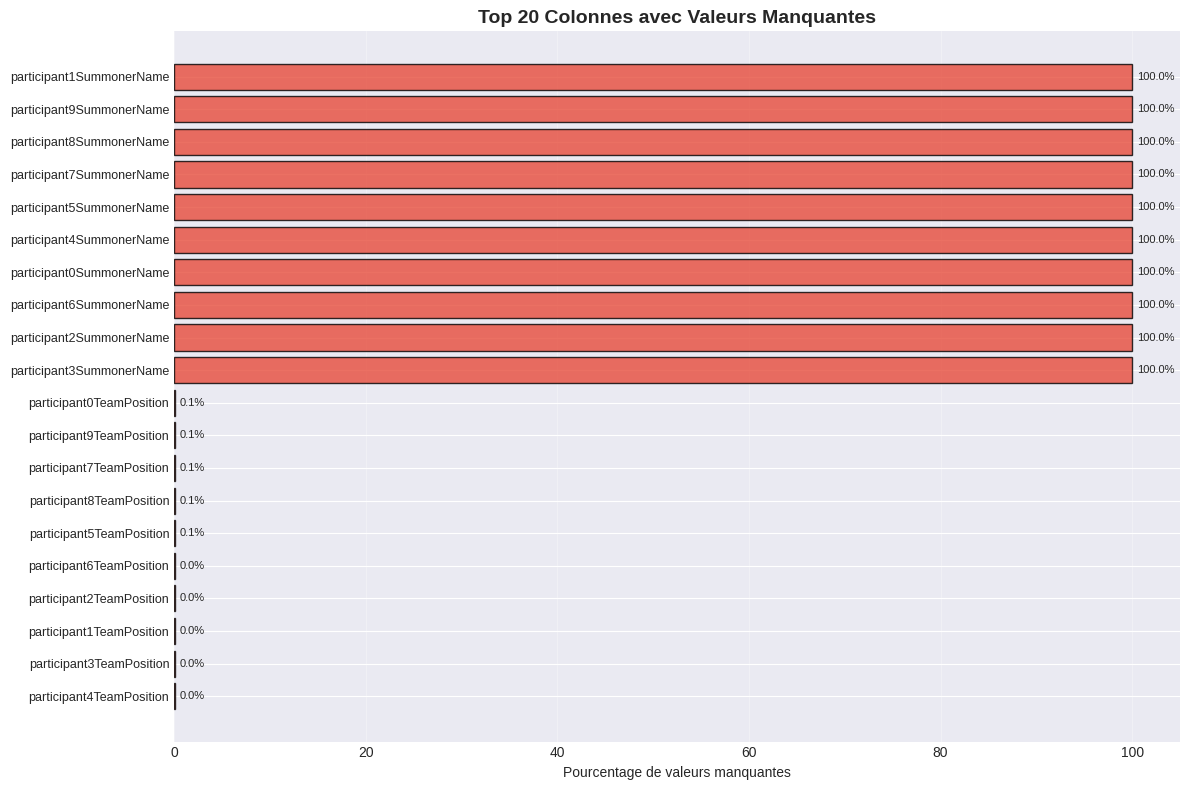

In [21]:
# Vérifier les valeurs manquantes
print("❓ VALEURS MANQUANTES")
print("=" * 50)

missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df) * 100).sort_values(ascending=False)

# Colonnes avec des valeurs manquantes
columns_with_missing = missing_percentage[missing_percentage > 0]

if len(columns_with_missing) > 0:
    print(f"Nombre de colonnes avec valeurs manquantes : {len(columns_with_missing)}/{len(df.columns)}")
    print(f"\nTop 20 colonnes avec le plus de valeurs manquantes :")
    print(columns_with_missing.head(20))
    
    # Visualisation
    if len(columns_with_missing) > 0:
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        top_missing = columns_with_missing.head(20)
        
        ax.barh(range(len(top_missing)), top_missing.values, color='#e74c3c', edgecolor='black', alpha=0.8)
        ax.set_yticks(range(len(top_missing)))
        ax.set_yticklabels(top_missing.index, fontsize=9)
        ax.set_xlabel('Pourcentage de valeurs manquantes')
        ax.set_title('Top 20 Colonnes avec Valeurs Manquantes', fontsize=14, fontweight='bold')
        ax.invert_yaxis()
        ax.grid(True, alpha=0.3, axis='x')
        
        for i, v in enumerate(top_missing.values):
            ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=8)
        
        plt.tight_layout()
        plt.show()
else:
    print("✅ Aucune valeur manquante détectée !")

In [22]:
# Vérifier les doublons
print("\n🔄 VÉRIFICATION DES DOUBLONS")
print("=" * 50)

duplicates = df.duplicated(subset=['matchId']).sum()
print(f"Nombre de matchs en double (même matchId) : {duplicates}")

if duplicates > 0:
    print("⚠️ Attention : Des matchs apparaissent plusieurs fois !")
    duplicate_ids = df[df.duplicated(subset=['matchId'], keep=False)]['matchId'].unique()
    print(f"Nombre de matchIds dupliqués : {len(duplicate_ids)}")
else:
    print("✅ Aucun doublon détecté.")


🔄 VÉRIFICATION DES DOUBLONS
Nombre de matchs en double (même matchId) : 0
✅ Aucun doublon détecté.


In [23]:
# Vérifier la cohérence des données
print("\n✓ VÉRIFICATION DE LA COHÉRENCE")
print("=" * 50)

# Vérifier que chaque match a exactement un gagnant
both_win = ((df['team0Win'] == True) & (df['team1Win'] == True)).sum()
no_winner = ((df['team0Win'] == False) & (df['team1Win'] == False)).sum()

print(f"Matchs où les deux équipes gagnent : {both_win}")
print(f"Matchs où aucune équipe ne gagne : {no_winner}")

if both_win == 0 and no_winner == 0:
    print("✅ Cohérence des résultats OK")
else:
    print("⚠️ Incohérence détectée dans les résultats !")

# Vérifier que gameDuration > 0
invalid_duration = (df['gameDuration'] <= 0).sum()
print(f"\nMatchs avec durée invalide (≤ 0) : {invalid_duration}")

if invalid_duration == 0:
    print("✅ Durées des matchs OK")
else:
    print("⚠️ Durées de matchs invalides détectées !")


✓ VÉRIFICATION DE LA COHÉRENCE
Matchs où les deux équipes gagnent : 0
Matchs où aucune équipe ne gagne : 5
⚠️ Incohérence détectée dans les résultats !

Matchs avec durée invalide (≤ 0) : 0
✅ Durées des matchs OK


## 💡 10. Insights et Conclusions

In [24]:
print("\n" + "="*70)
print("📊 RÉSUMÉ DE L'ANALYSE - INSIGHTS CLÉS")
print("="*70)

print(f"\n📁 VOLUME DE DONNÉES :")
print(f"   • {len(df):,} matchs analysés")
print(f"   • {df.shape[1]:,} colonnes par match")
print(f"   • ~{len(all_champions):,} picks de champions au total")

print(f"\n⏱️ DURÉE DES MATCHS :")
print(f"   • Moyenne : {duration_minutes.mean():.1f} minutes")
print(f"   • Médiane : {duration_minutes.median():.1f} minutes")
print(f"   • Matchs courts (<15 min) : {len(short_games):,} ({len(short_games)/len(df)*100:.2f}%)")
print(f"   • Matchs longs (>60 min) : {len(long_games):,} ({len(long_games)/len(df)*100:.2f}%)")

print(f"\n🏆 ÉQUILIBRE DES ÉQUIPES :")
blue_wr = team0_wins / total_games * 100
red_wr = team1_wins / total_games * 100
print(f"   • Blue Side : {blue_wr:.2f}% de victoires")
print(f"   • Red Side : {red_wr:.2f}% de victoires")
print(f"   • Écart : {abs(blue_wr - red_wr):.2f}% {'(Blue advantage)' if blue_wr > red_wr else '(Red advantage)'}")

print(f"\n🎮 CHAMPIONS :")
print(f"   • {len(champion_counts)} champions uniques")
print(f"   • Champion le plus joué : {champion_counts.index[0]} ({champion_counts.iloc[0]:,} picks)")
print(f"   • Champion le moins joué : {champion_counts.index[-1]} ({champion_counts.iloc[-1]:,} picks)")
print(f"   • Ratio de popularité : 1:{champion_counts.iloc[0]/champion_counts.iloc[-1]:.0f}")

print(f"\n🎯 POSITIONS :")
for pos, count in position_counts.items():
    print(f"   • {pos:10s} : {count/len(all_positions)*100:.2f}%")

print(f"\n⚔️ PERFORMANCE :")
print(f"   • Position avec le meilleur KDA : {kda_df['KDA'].idxmax()} ({kda_df['KDA'].max():.2f})")
print(f"   • Position avec le plus de dégâts : {avg_damage_series.index[0]} ({avg_damage_series.iloc[0]:,.0f})")

print(f"\n🐉 OBJECTIFS :")
print(f"   • Objectif le plus corrélé à la victoire : {corr_series.index[0]} ({corr_series.iloc[0]:+.3f})")
print(f"   • Dragons moyens par match : {(df['team0DragonKills'].mean() + df['team1DragonKills'].mean()):.2f}")
print(f"   • Barons moyens par match : {(df['team0BaronKills'].mean() + df['team1BaronKills'].mean()):.2f}")

print(f"\n✓ QUALITÉ DES DONNÉES :")
print(f"   • Valeurs manquantes : {len(columns_with_missing)} colonnes concernées")
print(f"   • Doublons : {duplicates} matchs")
print(f"   • Cohérence : {'OK ✅' if both_win == 0 and no_winner == 0 else 'Problèmes détectés ⚠️'}")

print(f"\n💡 RECOMMANDATIONS POUR LE MODÈLE ML :")
print(f"   1. Filtrer les matchs très courts (<15 min) pour éviter les surrenders précoces")
print(f"   2. Pondérer les échantillons par popularité des champions (éviter biais des rares)")
print(f"   3. Focus sur les champions populaires (top 50) pour plus de robustesse")
print(f"   4. Considérer le filtrage par ELO pour homogénéiser les stratégies")
print(f"   5. Prioriser les features avec forte corrélation (Tours, First Blood)")

print("\n" + "="*70)


📊 RÉSUMÉ DE L'ANALYSE - INSIGHTS CLÉS

📁 VOLUME DE DONNÉES :
   • 101,843 matchs analysés
   • 1,770 colonnes par match
   • ~1,018,430 picks de champions au total

⏱️ DURÉE DES MATCHS :
   • Moyenne : 28.0 minutes
   • Médiane : 28.4 minutes
   • Matchs courts (<15 min) : 2,506 (2.46%)
   • Matchs longs (>60 min) : 6 (0.01%)

🏆 ÉQUILIBRE DES ÉQUIPES :
   • Blue Side : 50.49% de victoires
   • Red Side : 49.51% de victoires
   • Écart : 0.98% (Blue advantage)

🎮 CHAMPIONS :
   • 171 champions uniques
   • Champion le plus joué : Yunara (26,210 picks)
   • Champion le moins joué : Kalista (1,047 picks)
   • Ratio de popularité : 1:25

🎯 POSITIONS :
   • JUNGLE     : 20.09%
   • TOP        : 19.98%
   • BOTTOM     : 19.98%
   • MIDDLE     : 19.97%
   • UTILITY    : 19.93%
   • Invalid    : 0.05%

⚔️ PERFORMANCE :
   • Position avec le meilleur KDA : UTILITY (2.84)
   • Position avec le plus de dégâts : BOTTOM (23,988)

🐉 OBJECTIFS :
   • Objectif le plus corrélé à la victoire : Tours (+

## 💾 11. Sauvegarde des Résultats

In [25]:
# Sauvegarder les statistiques clés dans un fichier
print("💾 Sauvegarde des résultats...")

# Créer un rapport
report = {
    'total_matches': len(df),
    'total_columns': df.shape[1],
    'avg_duration_minutes': duration_minutes.mean(),
    'blue_winrate': blue_wr,
    'red_winrate': red_wr,
    'unique_champions': len(champion_counts),
    'most_played_champion': champion_counts.index[0],
    'least_played_champion': champion_counts.index[-1],
}

# Sauvegarder
report_df = pd.DataFrame([report])
report_df.to_csv('data/analysis_report.csv', index=False)

# Sauvegarder les tops champions
champion_counts.to_csv('data/champion_popularity.csv', header=['count'])

# Sauvegarder les stats KDA
kda_df.to_csv('data/kda_by_position.csv')

print("✅ Résultats sauvegardés :")
print("   • data/analysis_report.csv")
print("   • data/champion_popularity.csv")
print("   • data/kda_by_position.csv")

💾 Sauvegarde des résultats...
✅ Résultats sauvegardés :
   • data/analysis_report.csv
   • data/champion_popularity.csv
   • data/kda_by_position.csv


---

## 🎯 Conclusion

Cette analyse exploratoire a permis de :
- ✅ Comprendre la structure du dataset (100k+ matchs, 1770 colonnes)
- ✅ Identifier les champions populaires et rares
- ✅ Analyser les performances par position
- ✅ Évaluer l'impact des objectifs sur la victoire
- ✅ Vérifier la qualité et cohérence des données

**Prochaines étapes :**
1. Filtrage des données (matchs courts, champions rares)
2. Feature engineering pour le modèle ML
3. Collecte des données d'ELO via API Riot
4. Entraînement du modèle amélioré

---